In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
from pylab import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("Customer_data.xlsx")

In [3]:
pd.set_option('display.max_rows',None)

In [4]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?,cust
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com,1
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com",1
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com",1
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com",1
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com",1


In [5]:
df.isnull().sum()  #there is no null values 

1Gender of respondent                                                                                                                                                                                                  0
2 How old are you?                                                                                                                                                                                                     0
3 Which city do you shop online from?                                                                                                                                                                                  0
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  0
5 Since How Long You are Shopping Online ?                                                                                          

In [6]:
df.shape  #there is 269 rows and 72 columns 

(269, 72)

<AxesSubplot:xlabel='1Gender of respondent', ylabel='count'>

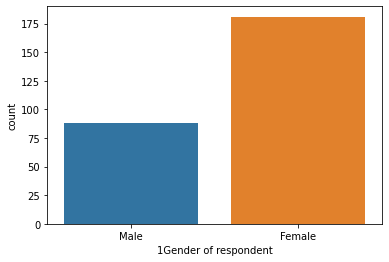

In [7]:
sns.countplot(x="1Gender of respondent",data=df)

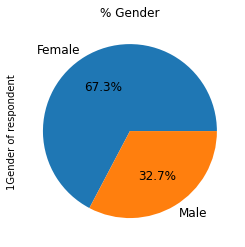

In [8]:
ax = (df['1Gender of respondent'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Female', 'Male'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

In [9]:
df.drop("4 What is the Pin Code of where you shop online from?",axis=1,inplace=True) #dropping the pincode column
df.drop("3 Which city do you shop online from?",axis=1,inplace=True) #dropping the city column also

In [10]:
df.shape

(269, 70)

In [11]:
df.drop("cust",axis=1,inplace=True) #dropping the cust column 

In [12]:
df.shape

(269, 69)

In [13]:
col1=df.select_dtypes(include=['object']).columns

for i in col1:
    print(df[i].value_counts())

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64
Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: 5 Since How Long You are Shopping Online ?, dtype: int64
Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: int64
Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64
Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: 8 Which device do you use to access the online shopping?, dtype: int64
Others        134
5.5 i

In [14]:
df1=pd.read_excel("Customer in numbers.xlsx")

In [15]:
col1=df1.select_dtypes(include=['object']).columns

for i in col1:
    print(df1[i].value_counts())

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: From the following, tick any (or all) of the online retailers you have shopped from;                             

<AxesSubplot:xlabel='1Gender of respondent', ylabel='Which of the Indian online retailer would you recommend to a friend?'>

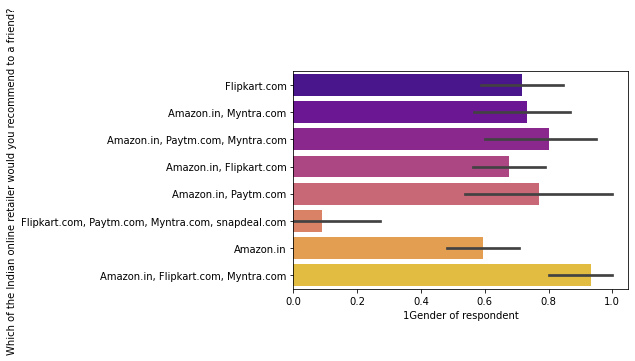

In [16]:
sns.barplot(x ='1Gender of respondent', y ='Which of the Indian online retailer would you recommend to a friend?', data = df1, palette ='plasma')

In [17]:
#amazon, flipkart and myntra are the most recomended websites

In [18]:
#from the above graph we can say that all the age groups total recommend the amazon.in website the most and then Amazon.in,flipkart.in

In [19]:
#univariate analysis

<Figure size 2880x1080 with 0 Axes>

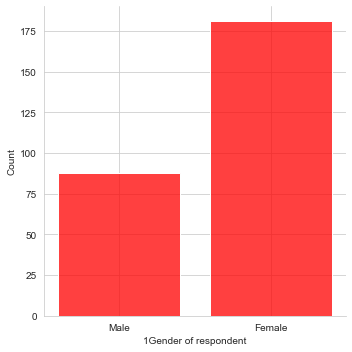

<Figure size 2880x1080 with 0 Axes>

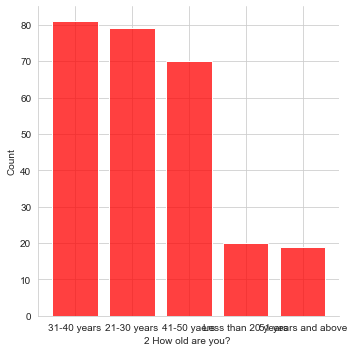

<Figure size 2880x1080 with 0 Axes>

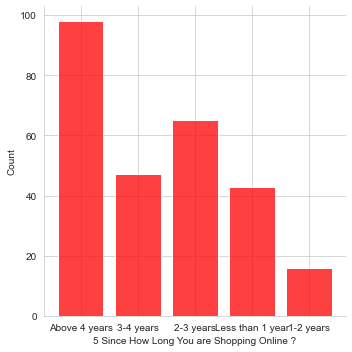

<Figure size 2880x1080 with 0 Axes>

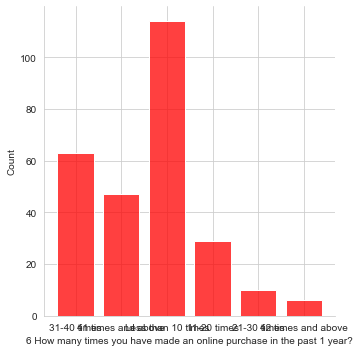

<Figure size 2880x1080 with 0 Axes>

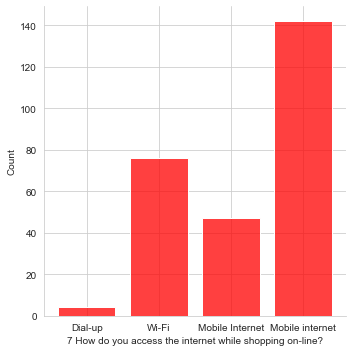

<Figure size 2880x1080 with 0 Axes>

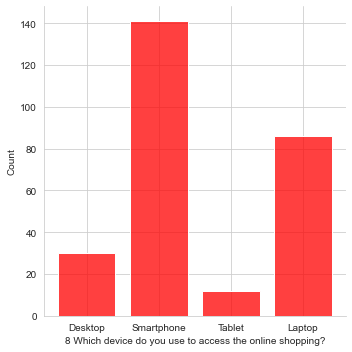

<Figure size 2880x1080 with 0 Axes>

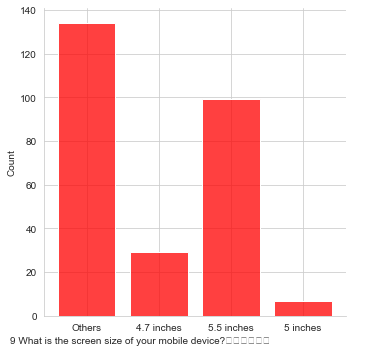

<Figure size 2880x1080 with 0 Axes>

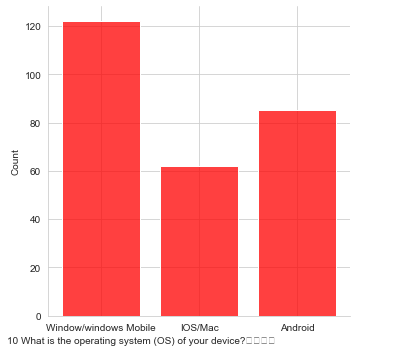

<Figure size 2880x1080 with 0 Axes>

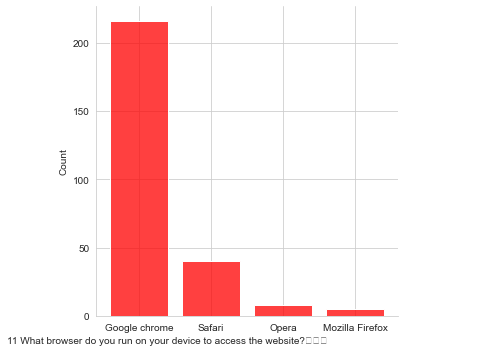

<Figure size 2880x1080 with 0 Axes>

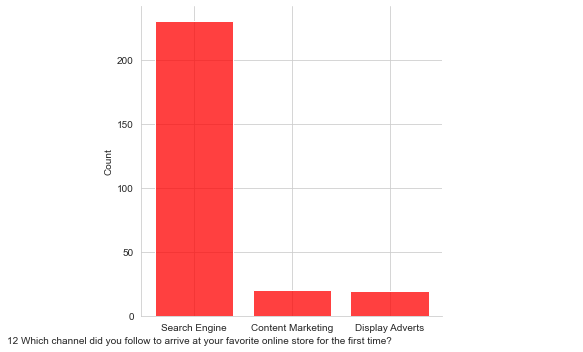

<Figure size 2880x1080 with 0 Axes>

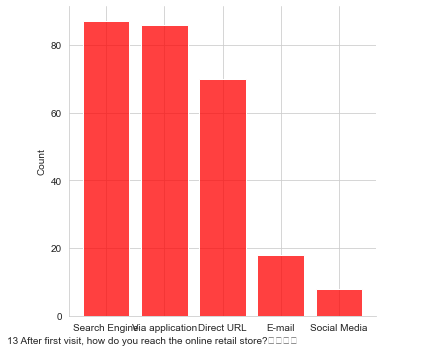

<Figure size 2880x1080 with 0 Axes>

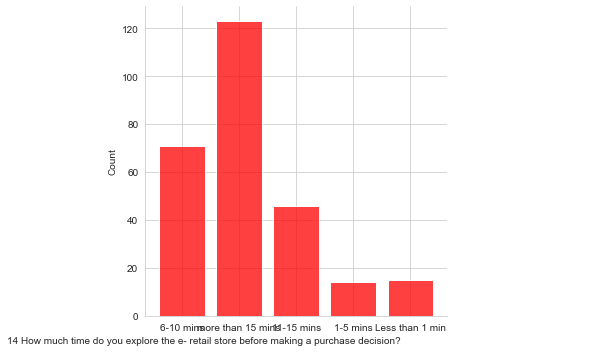

<Figure size 2880x1080 with 0 Axes>

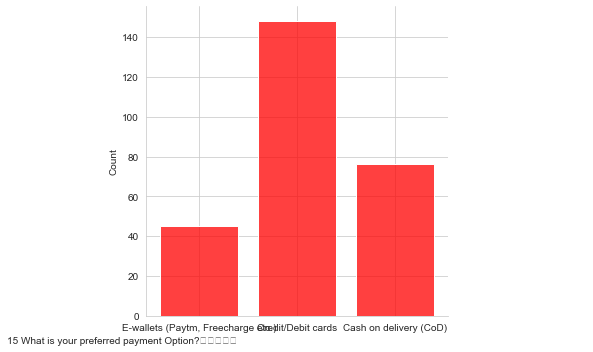

<Figure size 2880x1080 with 0 Axes>

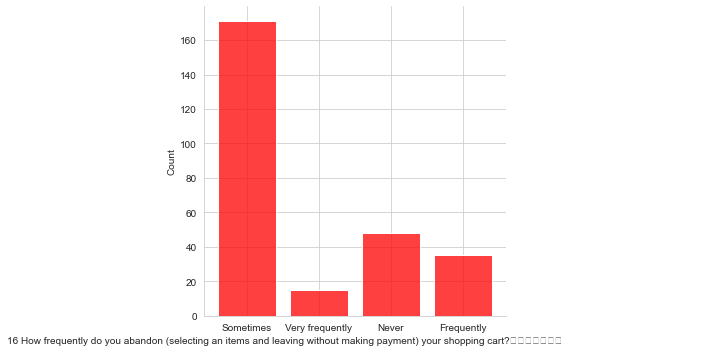

<Figure size 2880x1080 with 0 Axes>

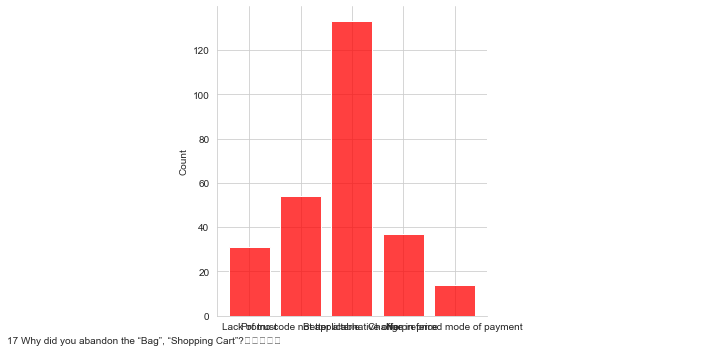

<Figure size 2880x1080 with 0 Axes>

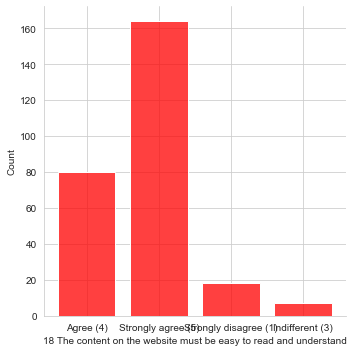

<Figure size 2880x1080 with 0 Axes>

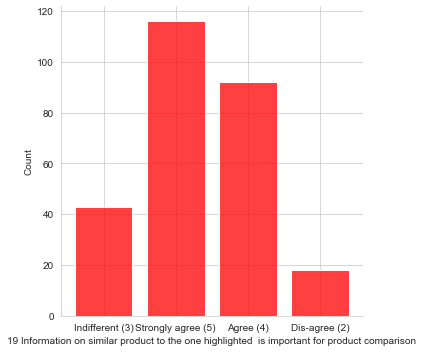

<Figure size 2880x1080 with 0 Axes>

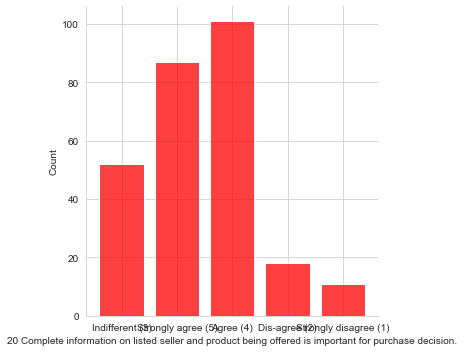

<Figure size 2880x1080 with 0 Axes>

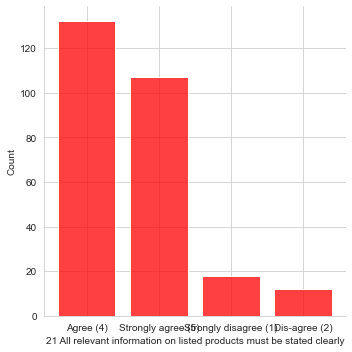

<Figure size 2880x1080 with 0 Axes>

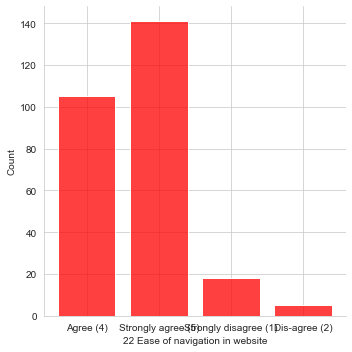

<Figure size 2880x1080 with 0 Axes>

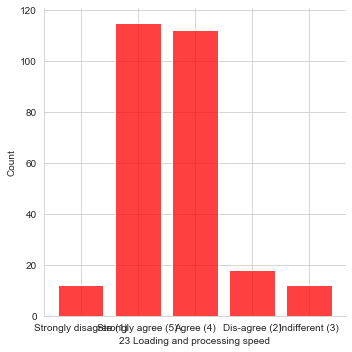

<Figure size 2880x1080 with 0 Axes>

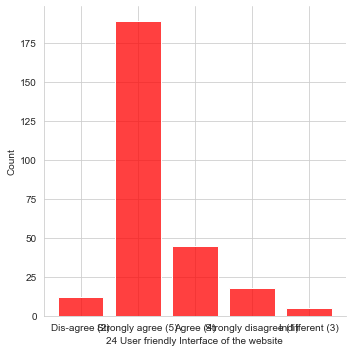

<Figure size 2880x1080 with 0 Axes>

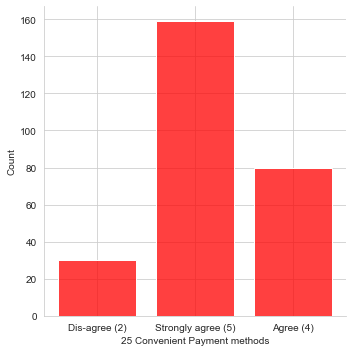

<Figure size 2880x1080 with 0 Axes>

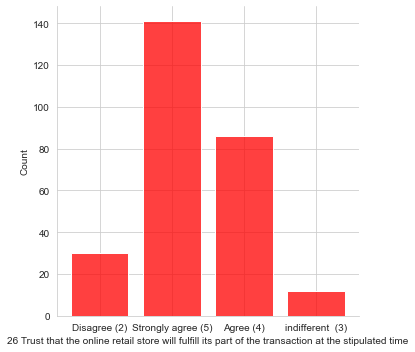

<Figure size 2880x1080 with 0 Axes>

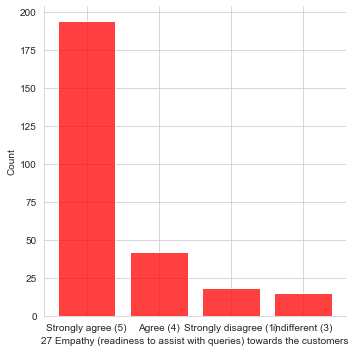

<Figure size 2880x1080 with 0 Axes>

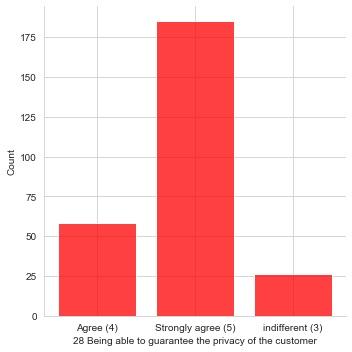

<Figure size 2880x1080 with 0 Axes>

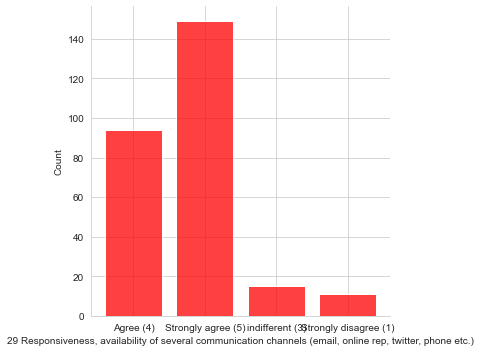

<Figure size 2880x1080 with 0 Axes>

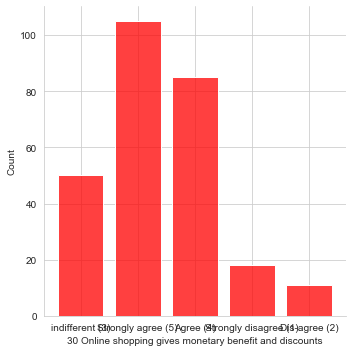

<Figure size 2880x1080 with 0 Axes>

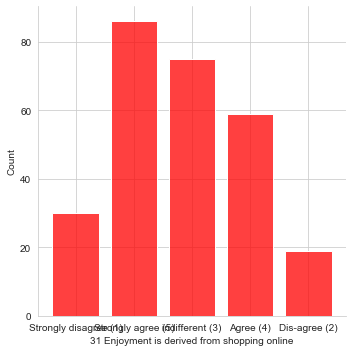

<Figure size 2880x1080 with 0 Axes>

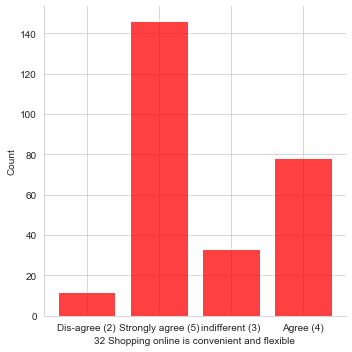

<Figure size 2880x1080 with 0 Axes>

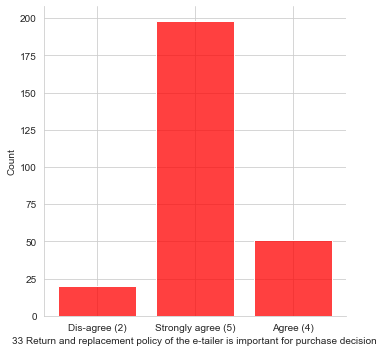

<Figure size 2880x1080 with 0 Axes>

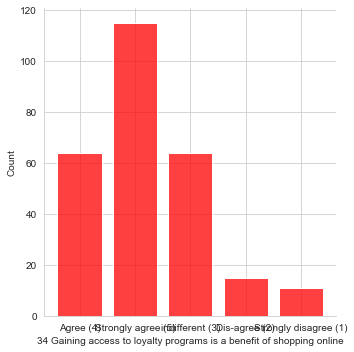

<Figure size 2880x1080 with 0 Axes>

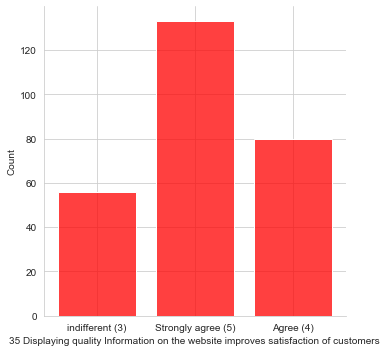

<Figure size 2880x1080 with 0 Axes>

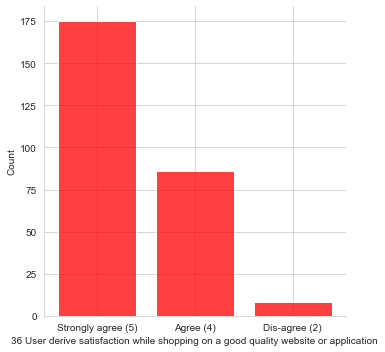

<Figure size 2880x1080 with 0 Axes>

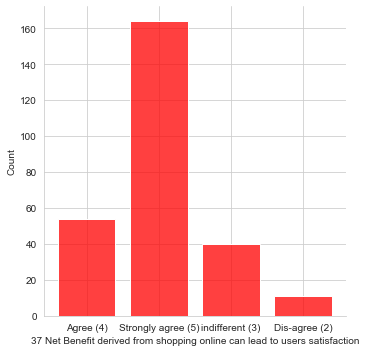

<Figure size 2880x1080 with 0 Axes>

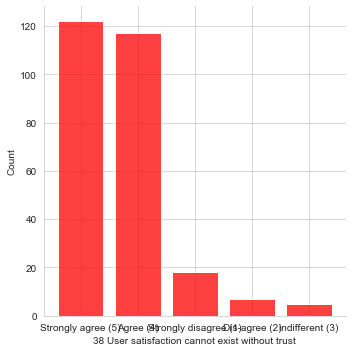

<Figure size 2880x1080 with 0 Axes>

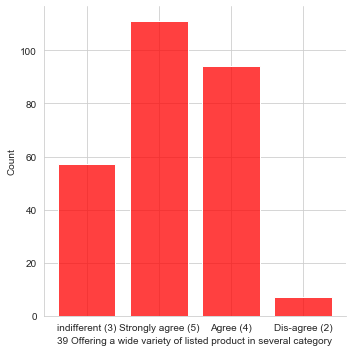

<Figure size 2880x1080 with 0 Axes>

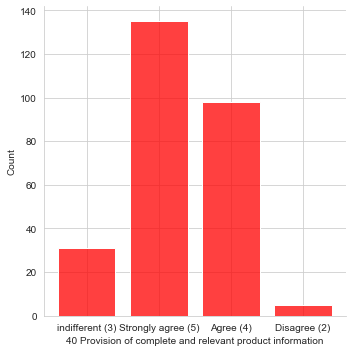

<Figure size 2880x1080 with 0 Axes>

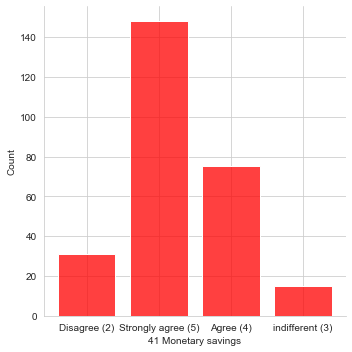

<Figure size 2880x1080 with 0 Axes>

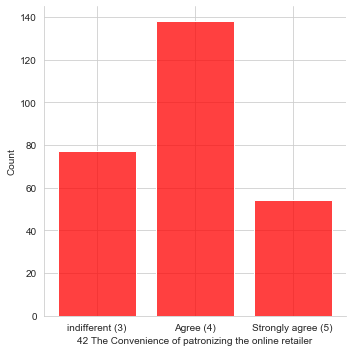

<Figure size 2880x1080 with 0 Axes>

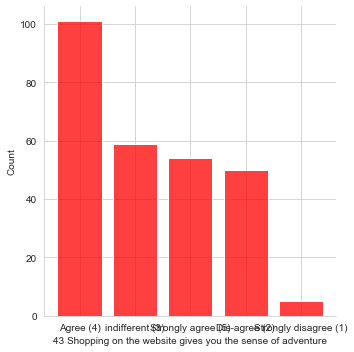

<Figure size 2880x1080 with 0 Axes>

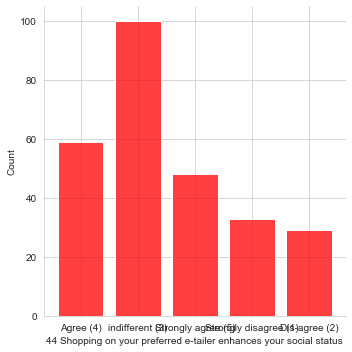

<Figure size 2880x1080 with 0 Axes>

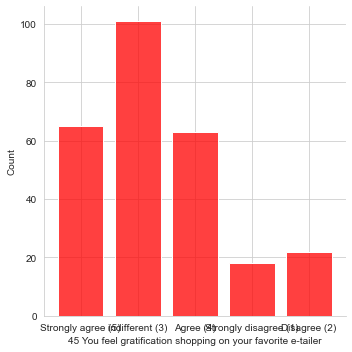

<Figure size 2880x1080 with 0 Axes>

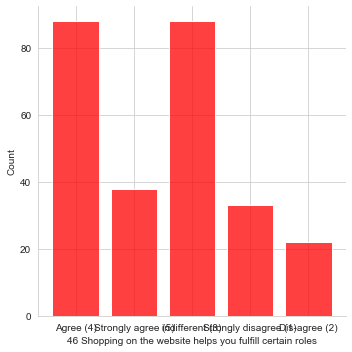

<Figure size 2880x1080 with 0 Axes>

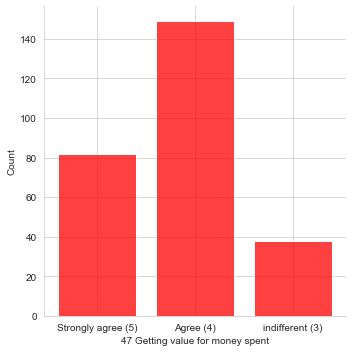

<Figure size 2880x1080 with 0 Axes>

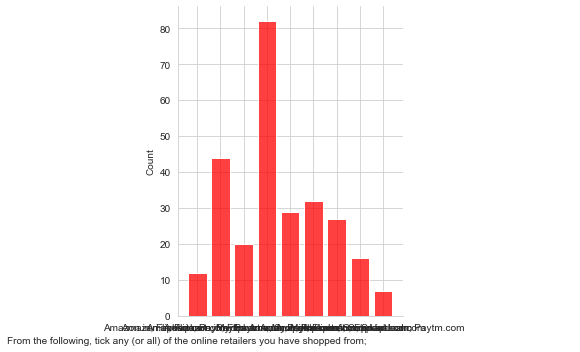

<Figure size 2880x1080 with 0 Axes>

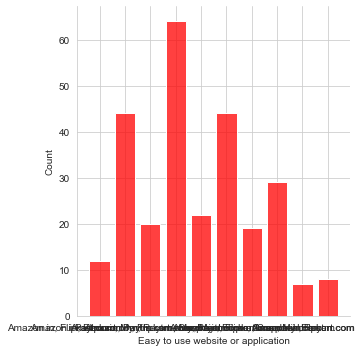

<Figure size 2880x1080 with 0 Axes>

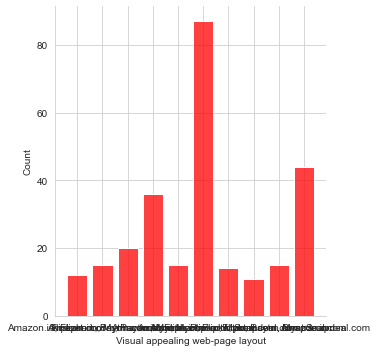

<Figure size 2880x1080 with 0 Axes>

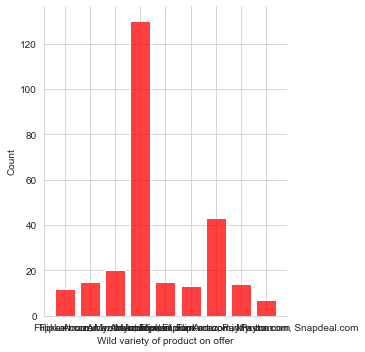

<Figure size 2880x1080 with 0 Axes>

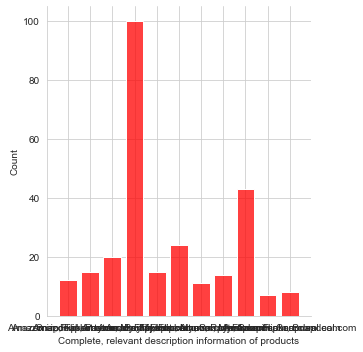

<Figure size 2880x1080 with 0 Axes>

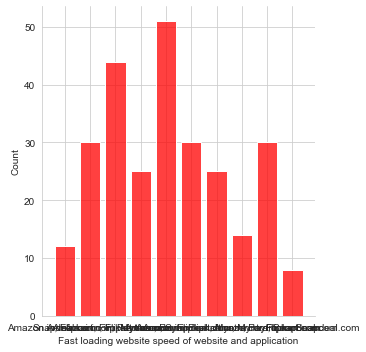

<Figure size 2880x1080 with 0 Axes>

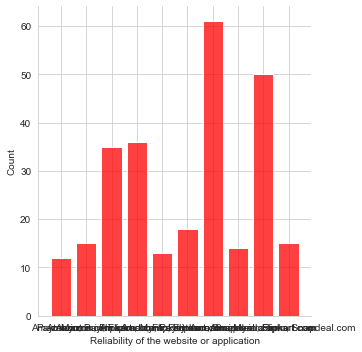

<Figure size 2880x1080 with 0 Axes>

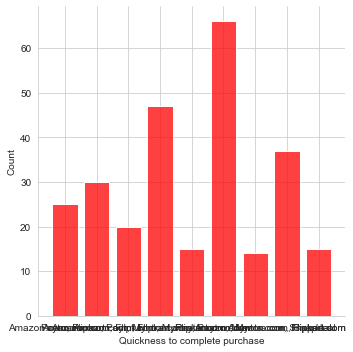

<Figure size 2880x1080 with 0 Axes>

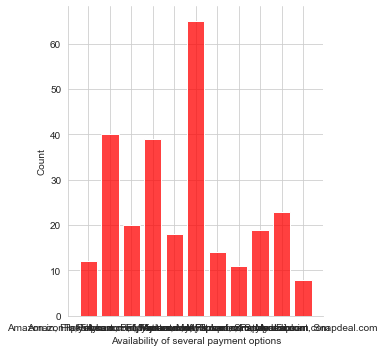

<Figure size 2880x1080 with 0 Axes>

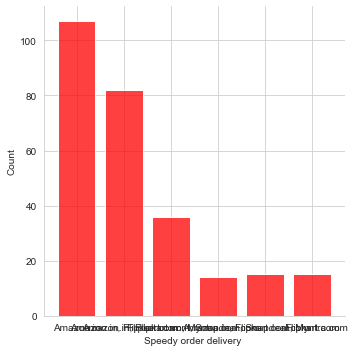

<Figure size 2880x1080 with 0 Axes>

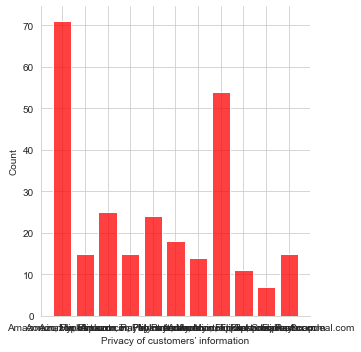

<Figure size 2880x1080 with 0 Axes>

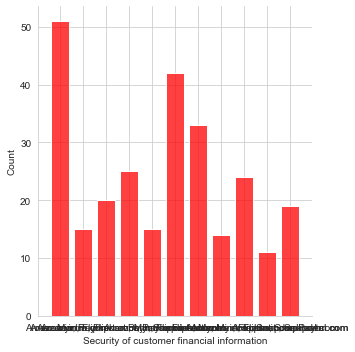

<Figure size 2880x1080 with 0 Axes>

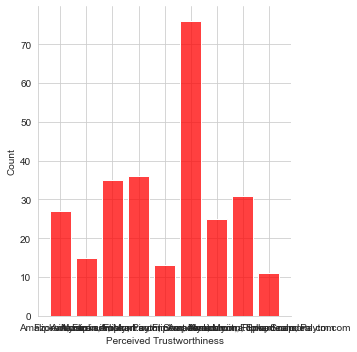

<Figure size 2880x1080 with 0 Axes>

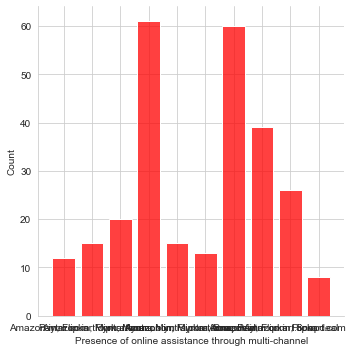

<Figure size 2880x1080 with 0 Axes>

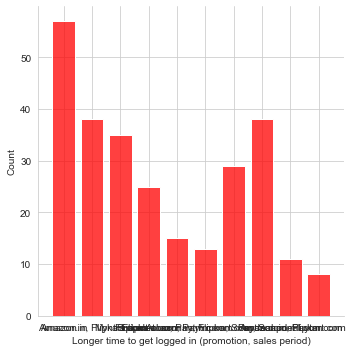

<Figure size 2880x1080 with 0 Axes>

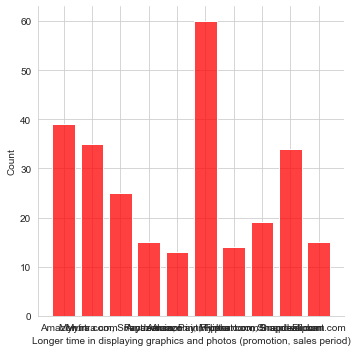

<Figure size 2880x1080 with 0 Axes>

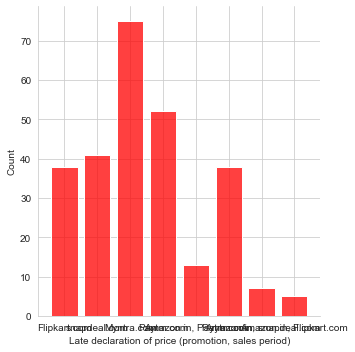

<Figure size 2880x1080 with 0 Axes>

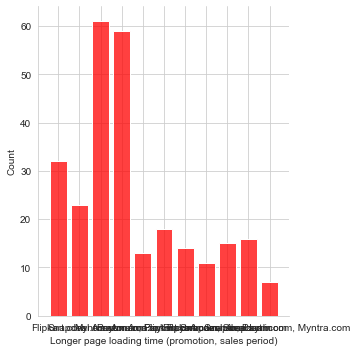

<Figure size 2880x1080 with 0 Axes>

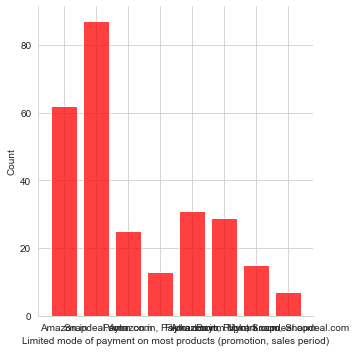

<Figure size 2880x1080 with 0 Axes>

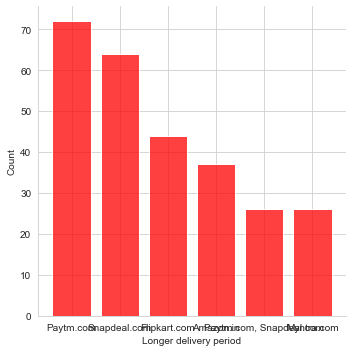

<Figure size 2880x1080 with 0 Axes>

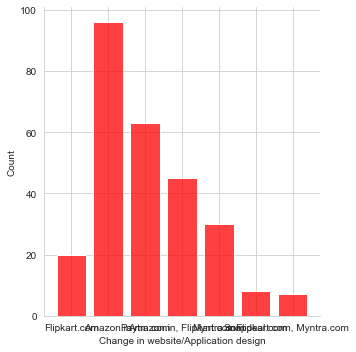

<Figure size 2880x1080 with 0 Axes>

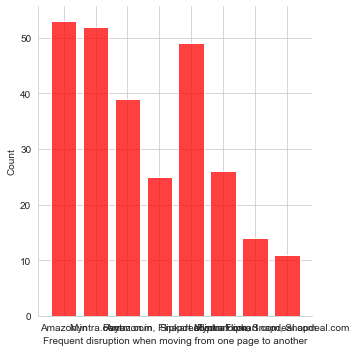

<Figure size 2880x1080 with 0 Axes>

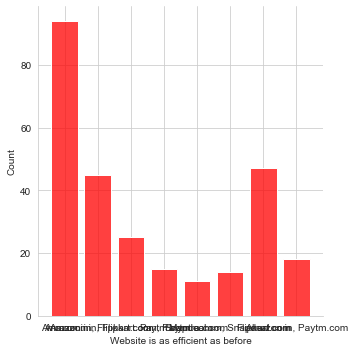

<Figure size 2880x1080 with 0 Axes>

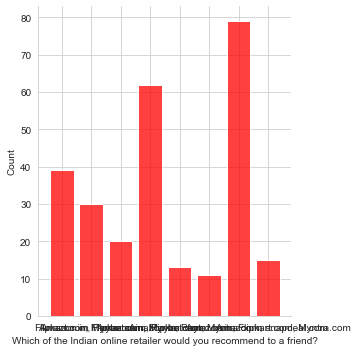

In [20]:
columns=df.columns


for i in df[columns]:
    sns.set_style('whitegrid')
    plt.figure(figsize=(40,15))
    sns.displot(df[i],kde=False,color='red',shrink=.8,discrete=True)

In [21]:
#There are more female candidates active for online shopping then men.
#31-40 years and 21-30 years of age people do more shopping.
#Mobile internet and smartphones are used the most while accessing the online websites
#There is no specific size matters of the mobile phone
#Windows operating system is used the most in the devices
#In laptop google chrome is used the most
#search engine was the first time used by people to reach the websites
#87 number of people go through via search engine and 86 people go through via application
#people take more than 15 mins to explore the eretail websites before making a purchase decision
#credit cards and debit cards are used the most for the payment and then COD and then ewallets
#Sometimes only it happen that people select an item and leave without making payment
#Because of better alternative offer people select an item and leave without making payment
#The content should be easy to read and understand of the retail websites
#product comparison is important
#Complete information is required of the product
#Website should be flexible to use 
#Loading and processing speed should be more
#User frendlly interface
#Convinient payment method
#trust of the online website
#Amazon gives more monetory benefits and discounts
#Return and replacement olicy is very important
#amazon and flipkart is having visual web page layout
#amazon and flipkart is having more offers
#amazon and flipkart is having complete imformation
#amazon is the most reliable website
#quickness in purchasing product is in Amazon
#amazon and flipkart is having more payment option
#amazon is having speed delivery
#amazon maintains the privacy of the customers
#amazon has the security of customer finncial informaton
#Myntra declares the late promotions and sales period
#paytm has longer delivery time
#Amazon changes its web design and application design most frequently
#Amazon is efficient as always
#Overall Amazon is the best website to be recommended and then flipkart

In [22]:
#bivariate analysis

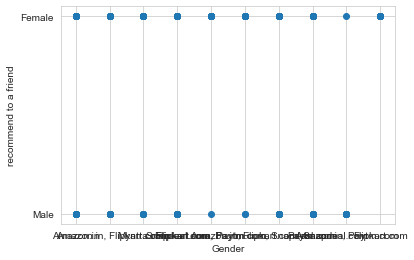

In [23]:
plt.scatter(df["Longer time to get logged in (promotion, sales period)"],df["1Gender of respondent"])
plt.xlabel("Gender")
plt.ylabel("recommend to a friend")
plt.show()

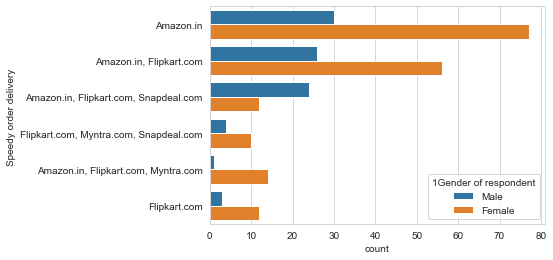

In [24]:
sns.countplot(y="Speedy order delivery ", hue="1Gender of respondent", data=df);

In [25]:
#The amazon.in has the fastest speed order delivery said by male and female both.

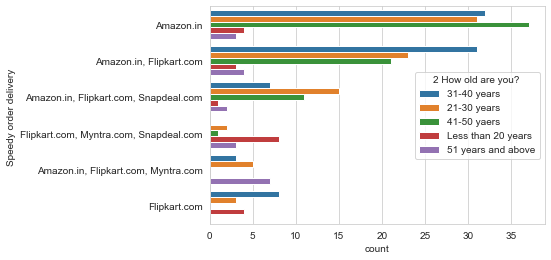

In [26]:
sns.countplot(y="Speedy order delivery ", hue="2 How old are you? ", data=df);

In [27]:
#People with all the age group says that amazon has the speed delivery

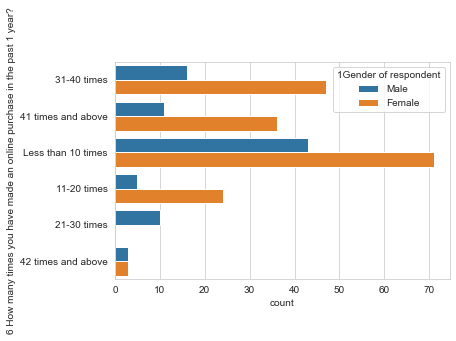

In [28]:
sns.countplot(y="6 How many times you have made an online purchase in the past 1 year?", hue="1Gender of respondent", data=df);

In [29]:
#In the past one year total 114 male and female did shopping less than 10 time 

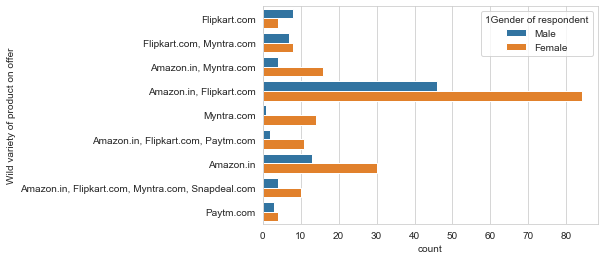

In [30]:
sns.countplot(y="Wild variety of product on offer", hue="1Gender of respondent", data=df);

In [31]:
# Amazon and flipkart gives wide variety of offers concluded by more than 40 males and more than 80 females

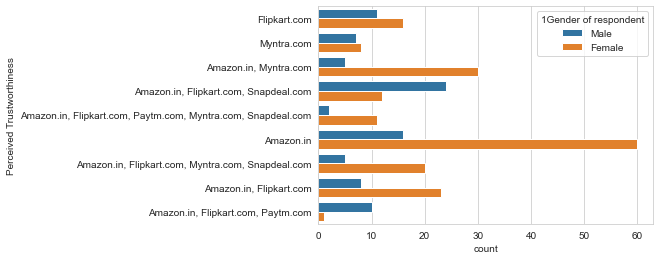

In [32]:
sns.countplot(y="Perceived Trustworthiness", hue="1Gender of respondent", data=df);

In [33]:
#Female has showed trust in Amazon and male in amazon, flipkart and snapdeal
#Female has shown less trust in amazon, flipkart and paytm it is because of the paytm application as we can see amazon and flipkart individually has scored more trust so paytm application has to increase its trust by security and other means.

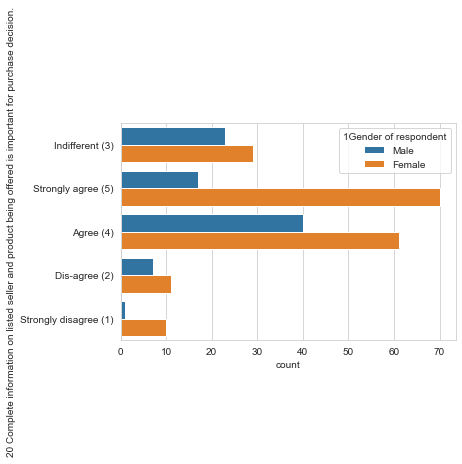

In [34]:
sns.countplot(y="20 Complete information on listed seller and product being offered is important for purchase decision.", hue="1Gender of respondent", data=df);

In [35]:
#Female say that it is very important and strongly agrees that the complete information should be there for the product where as male only agrees that  

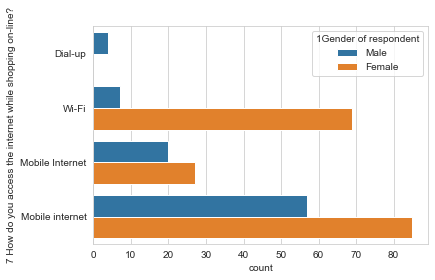

In [36]:
sns.countplot(y="7 How do you access the internet while shopping on-line?", hue="1Gender of respondent", data=df);

In [37]:
#Male and female both uses mobile internet the most for shopping

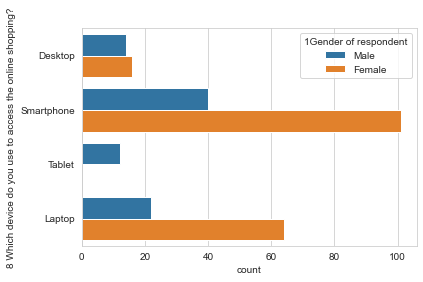

In [38]:
sns.countplot(y="8 Which device do you use to access the online shopping?", hue="1Gender of respondent", data=df);

In [39]:
#Male and female both uses mobile phones the most for shopping

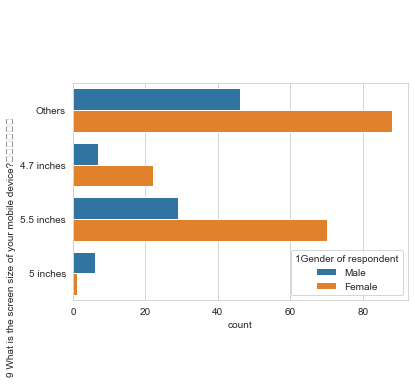

In [40]:
sns.countplot(y="9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ", hue="1Gender of respondent", data=df);

In [41]:
#There is no specific phone screen size

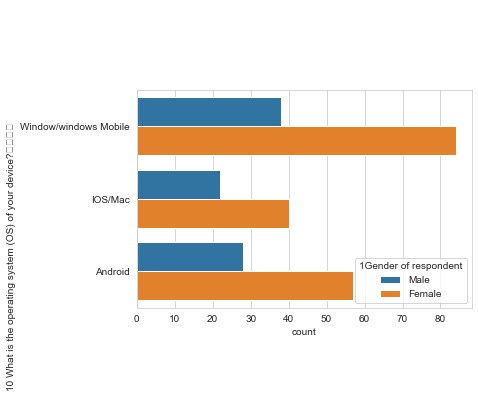

In [42]:
sns.countplot(y="10 What is the operating system (OS) of your device?\t\t\t\t                                          ", hue="1Gender of respondent", data=df);

In [43]:
#Male and female both uses windows operating system in the devices.

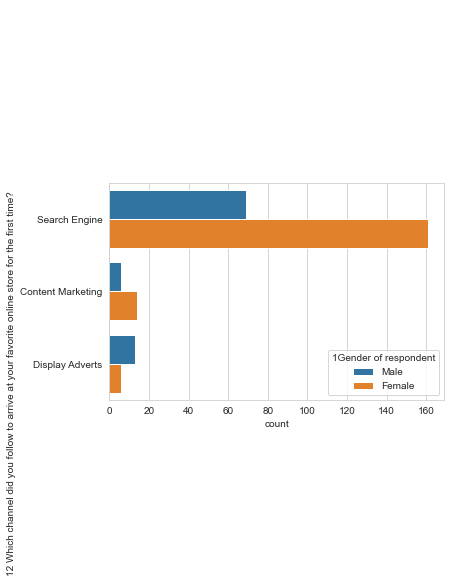

In [44]:
sns.countplot(y="12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ", hue="1Gender of respondent", data=df);

In [45]:
#serch engine channel is followed by male and female to arrive at the favorite online store for the first time

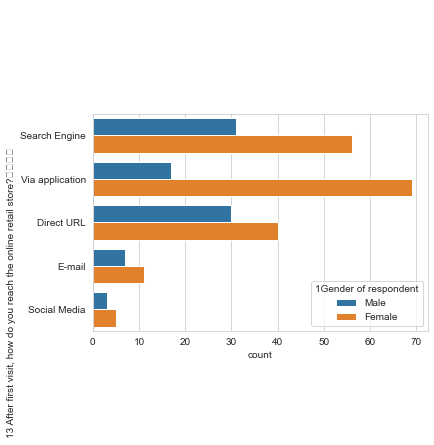

In [46]:
sns.countplot(y="13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ", hue="1Gender of respondent", data=df);

In [47]:
#Male uses search engine to reach the online store and female uses applicaion to reach the online stores

In [48]:
#The conclusion for the system quality is the online wen=bsites should be compatible more on the mobile and the mobile phone should have windows operating system compatability.

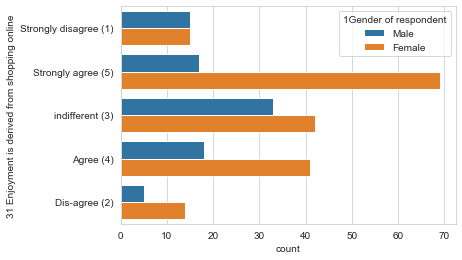

In [49]:
sns.countplot(y="31 Enjoyment is derived from shopping online", hue="1Gender of respondent", data=df);

In [50]:
#female says that enjoyment is derived from shopping online but male is not sure about it

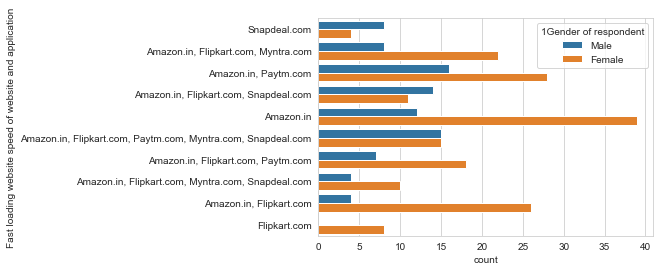

In [51]:
sns.countplot(y="Fast loading website speed of website and application", hue="1Gender of respondent", data=df);

In [52]:
#female says amazon has the Fast loading website speed of website and application whereas male says amazon and paytm has the Fast loading website speed of website and application

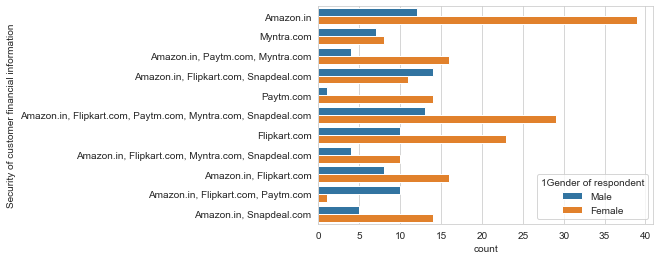

In [53]:
sns.countplot(y="Security of customer financial information", hue="1Gender of respondent", data=df);

In [54]:
#Amazon has the most security of customer financial information

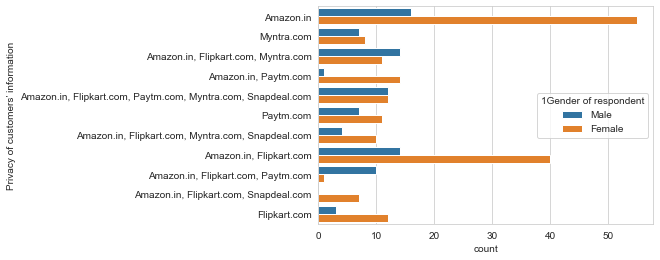

In [55]:
sns.countplot(y="Privacy of customers’ information", hue="1Gender of respondent", data=df);

In [56]:
#Amazon has the most Privacy of customers information said by male and female

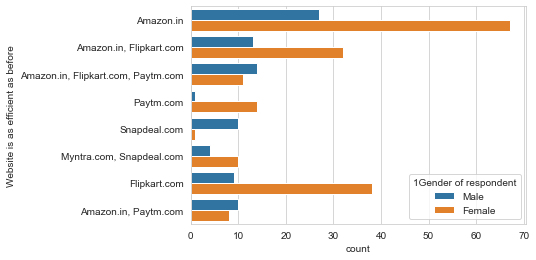

In [57]:
sns.countplot(y="Website is as efficient as before", hue="1Gender of respondent", data=df);

In [58]:
# amazon is efficient as before said by male and female

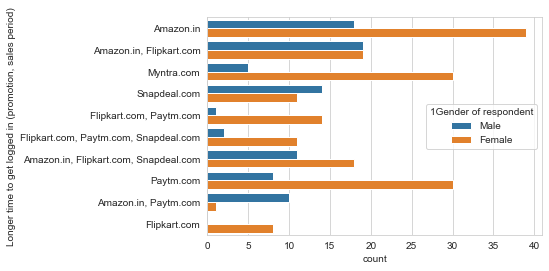

In [59]:
sns.countplot(y="Longer time to get logged in (promotion, sales period)", hue="1Gender of respondent", data=df);

In [60]:
#amazon and myntra offers more sales and promotions

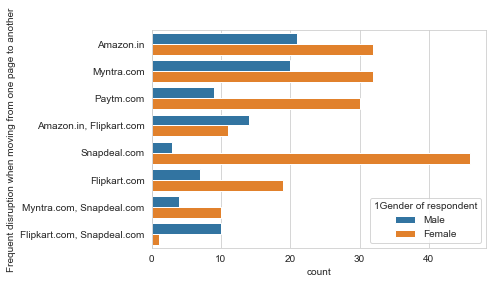

In [61]:
sns.countplot(y="Frequent disruption when moving from one page to another", hue="1Gender of respondent", data=df);

In [62]:
#snapdeal has the frequent disuption when moving from one page to another according to female

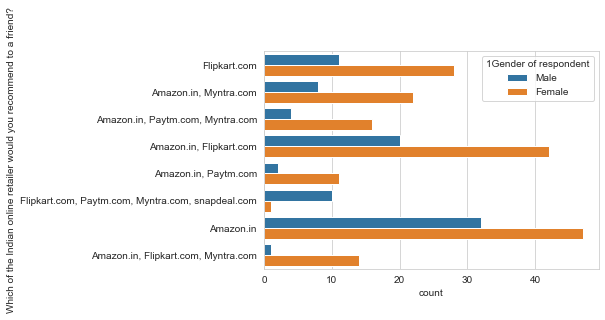

In [63]:
sns.countplot(y="Which of the Indian online retailer would you recommend to a friend?", hue="1Gender of respondent", data=df);

In [64]:
#Amazon is the on the first number then flipkart the myntra

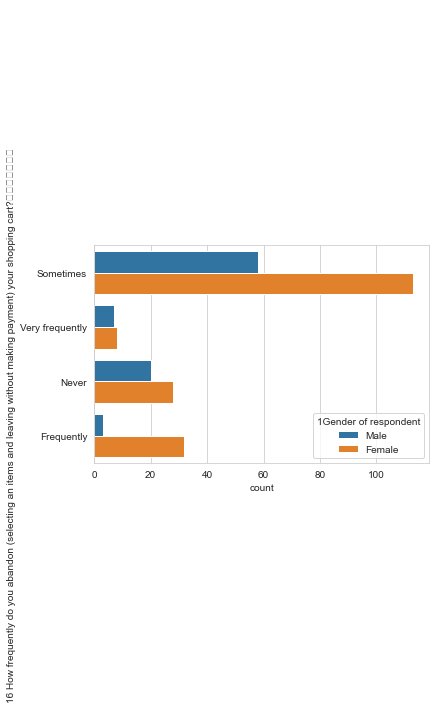

In [65]:
sns.countplot(y="16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ", hue="1Gender of respondent", data=df);

In [66]:
#Sometimes only it happens that people abandon the cart and leave the cart without making the payment.

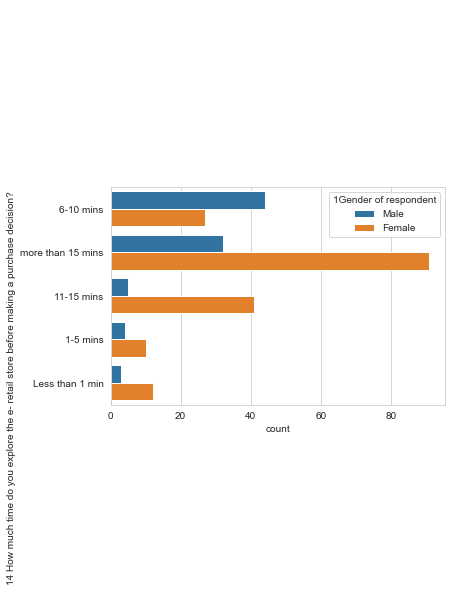

In [67]:
sns.countplot(y='14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ', hue="1Gender of respondent", data=df);

In [68]:
# male spends 6 to 10 mins to explore the e- retail store before making a purchase decision and female spends more than 15 mins 

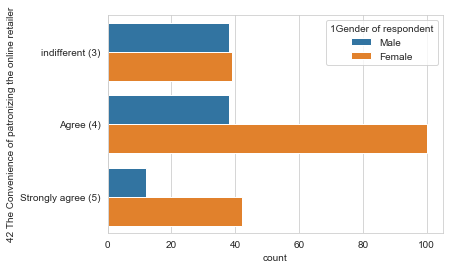

In [69]:
sns.countplot(y='42 The Convenience of patronizing the online retailer', hue="1Gender of respondent", data=df);

In [70]:
#patronizing is agreed by the male and female but not strongly

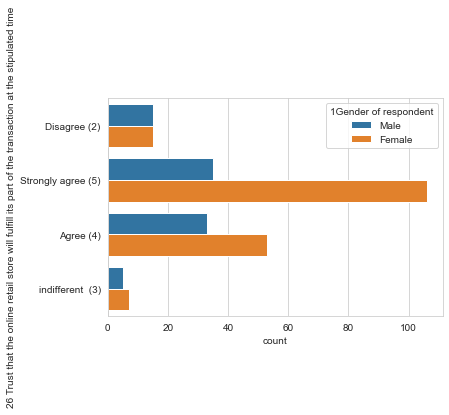

In [71]:
sns.countplot(y='26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time', hue="1Gender of respondent", data=df);

In [72]:
#online retail store should fulfill its part of the transaction at the stipulated time

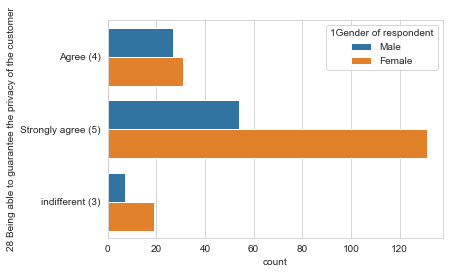

In [73]:
sns.countplot(y='28 Being able to guarantee the privacy of the customer', hue="1Gender of respondent", data=df);

In [74]:
#THE ONLINE RETAIL WEBSITES SHOULD GURANTEE THE PRIVACY OF THE CUSTOMER

In [76]:
#the final conclusion is AMAZON.IN is the best website which is best in trust, service quality, system quality, information quality and in net benefit. And also it support all the things which is required for online shopping.
#The second is flipkart and myntra
#Trust is important where all the websites should build for more productivity.
#Online websites should build the trust in all the perspective for better benefit. 
#The main point is all the websites should built in all the such perspective trust, service quality, system quality, information quality and in net benefit too where the customer get every benefit and comfort to shop.
